BEGINNER       
LEVEL TASK 
(PART 03)

Task 1: Linear Regression for Sales Prediction

- Description
 : Build a simple regression model to predict future sales 
based on time and promotions.
- Features:
 Select features like date, promotions, and holidays.
 - Train/Test split of the dataset.
 - Build a Linear Regression model.
 - Tech Stack
 : Python, Pandas, Scikit-learn.
 - Learning Outcomes
 : Gain first hands-on experience with 
regression modeling.
 - DATA SET LINK 
https://www.kaggle.com/competitions/store-sales-time-series
forecasting


<table align="center">
  <td>
    <a href="https://colab.research.google.com/github/BUFONJOKER/ml-c1-w3/blob/master/1-classification.ipynb" target="_parent">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"
      style="height:80px; width:auto;"/>
    </a>
  </td>
</table>

# 1-Import Libraries

In [1]:
# importing necassary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# to download larger file
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 2-Load Dataset

In [2]:
# this will take some time to run
# as files are large

# for large files to download
train_file_id = "1dolERdQAjO3DyvxbZAJ6nFt8_D36DaNk"
train_url = f"https://drive.google.com/uc?id={train_file_id}"

gdown.download(train_url, "train.csv", quiet=False)
df_train = pd.read_csv("train.csv")

# for small files

holiday_events_file_id = "1wzcBTBFN0udCcU1Up7KfN2UQte9pFOJQ"
holiday_events_url = f"https://drive.google.com/uc?export=download&id={holiday_events_file_id}"
df_holiday_events = pd.read_csv(holiday_events_url)


Downloading...
From (original): https://drive.google.com/uc?id=1dolERdQAjO3DyvxbZAJ6nFt8_D36DaNk
From (redirected): https://drive.google.com/uc?id=1dolERdQAjO3DyvxbZAJ6nFt8_D36DaNk&confirm=t&uuid=3caae8fe-ffdf-41ec-b3a5-758e257b1648
To: /content/train.csv
100%|██████████| 122M/122M [00:00<00:00, 153MB/s] 


# 3- EDA (Exploratory Data Analysis)

---

## Data Cleaning

In [3]:
# checking the shape and
# take a look at first few rows
print(f"df_train shape = {df_train.shape}")
df_train.head()

df_train shape = (3000888, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
# checking the shape and
# take a look at first few rows
print(f"df_holiday_events shape = {df_holiday_events.shape}")
df_holiday_events.head()

df_holiday_events shape = (350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
# to see all columns names in the dataframe
df_train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [6]:
# to see all columns names in the dataframe
df_holiday_events.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [7]:
# Holiday → official holidays
# Event → non-holiday events (like sports, festivals)
# Additional → extra holidays declared in some regions
# Transfer → holidays observed on a different date
# Bridge → “bridge days” between holidays and weekends
# Work Day → normally a holiday, but declared as a working day
# so, we consodering ['Holiday', 'Transfer',
#  'Additional', 'Bridge'] as holidays and others not

df_holiday_events['isHoliday'] = df_holiday_events['type'].isin(['Holiday', 'Transfer', 'Additional', 'Bridge']).astype(int)

In [8]:
# to see the distribution of holidays vs non-holidays
df_holiday_events['isHoliday'].value_counts()

,count
isHoliday,
1,289
0,61


In [9]:
# merging holiday events data with train data
# on date column
df = pd.merge(df_train,df_holiday_events,on='date',how='left')

In [10]:
# removing unneccessary columns
df = df.drop(
    columns=[
        'type','locale',
        'locale_name','description',
        'transferred'
    ], axis=1
)

In [11]:
# checking for missing values
# in each column
df.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
isHoliday,2551824


In [12]:
# to see the distribution of holidays vs non-holidays
df['isHoliday'].value_counts()

,count
isHoliday,
1.0,393822
0.0,108702


In [13]:
# rows and columns in the final dataframe
df.shape

(3054348, 7)

In [14]:
# checking how many dates are 
# present in df_train which are also
# present in df_holiday_events
df_train['date'].isin(df_holiday_events['date']).sum()

np.int64(449064)

In [15]:
# checking how many null values are there
# in isHoliday column
df['isHoliday'].isnull().sum()

np.int64(2551824)

In [16]:
# filling null values with 0
df['isHoliday'] = df['isHoliday'].fillna(0)

In [17]:
# to see the distribution of holidays vs non-holidays
df['isHoliday'].value_counts()

,count
isHoliday,
0.0,2660526
1.0,393822


In [18]:
# checking the maximum value in onpromotion column
df['onpromotion'].max()

741

In [19]:
# checking the minimum value in onpromotion column
df['onpromotion'].min()

0

In [20]:
# checking the maximum value in sales column
df['sales'].max()

124717.0

In [21]:
# checking the minimum value in sales column
df['sales'].min()

0.0

In [22]:
# checking for missing values
# in each column
df.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
isHoliday,0


In [23]:
# checking for duplicate rows
df.duplicated().sum()

np.int64(40986)

In [24]:
# removing duplicate rows
df.drop_duplicates(inplace=True)

In [25]:
# checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [26]:
# descriptive statistics of the dataframe
df.describe()

,id,store_nbr,sales,onpromotion,isHoliday
count,3.013362e+06,3.013362e+06,3.013362e+06,3.013362e+06,3.013362e+06
mean,1.501546e+06,2.750000e+01,3.581593e+02,2.608859e+00,1.176818e-01
std,8.660866e+05,1.558579e+01,1.104958e+03,1.225473e+01,3.222311e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.515582e+05,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.503116e+06,2.750000e+01,1.100000e+01,0.000000e+00,0.000000e+00
75%,2.249329e+06,4.100000e+01,1.960000e+02,0.000000e+00,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.000000e+00


In [27]:
# columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3013362 entries, 0 to 3054347
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   isHoliday    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 183.9+ MB


In [28]:
# columns and their data types
df.dtypes

,0
id,int64
date,object
store_nbr,int64
family,object
sales,float64
onpromotion,int64
isHoliday,float64


In [29]:
# converting date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [30]:
# creating new columns for
# day of week, month and year
# from the date column
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [31]:
# count of each day of the week
df['day_of_week'].value_counts()

,count
day_of_week,
5,433026
3,431244
1,431244
6,431244
2,429462
0,429462
4,427680


---

## Data Visualization

In [32]:
# as our dataset is very large
# we some time use random sample of 10000 rows
df_sample = df.sample(n=10000, random_state=42)

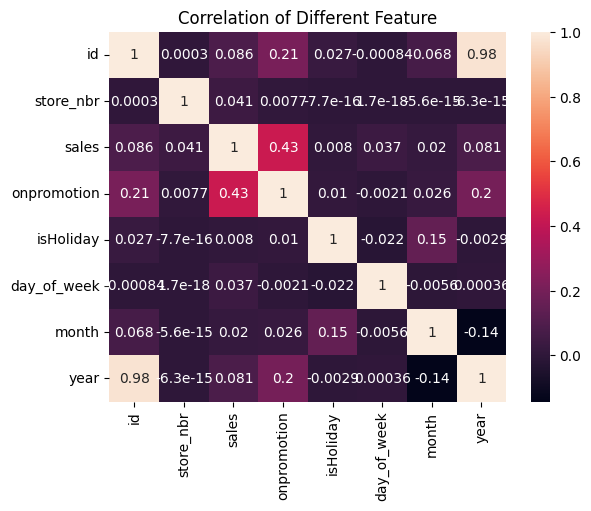

In [33]:
# plotting heatmap to check relationship
# between different features
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True
)
plt.title("Correlation of Different Feature")
plt.show()

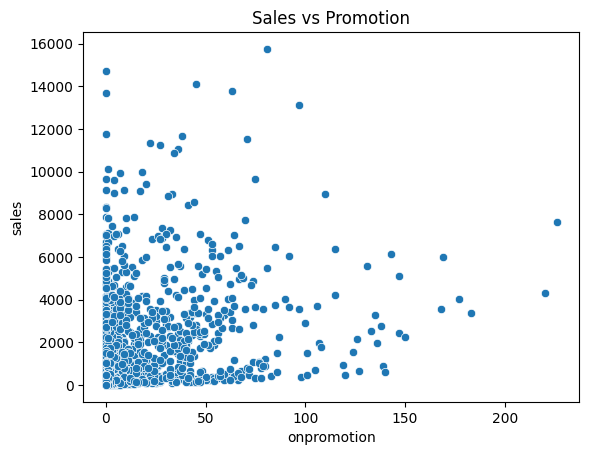

In [34]:
# plotting sales vs onpromotion
sns.scatterplot(data=df_sample,x='onpromotion',y='sales')
plt.title("Sales vs Promotion")
plt.show()

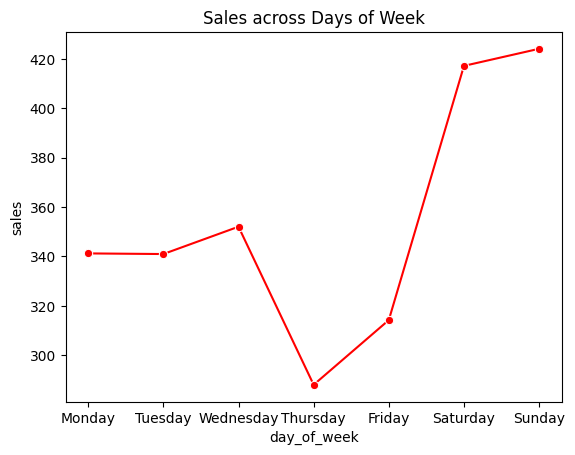

In [35]:
# plotting sales across different days of week
ax = sns.lineplot(data=df_sample,x='day_of_week',
y='sales',marker='o',color='red',errorbar=None)
ax.set_xticks(range(7))
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Sales across Days of Week")
plt.show()

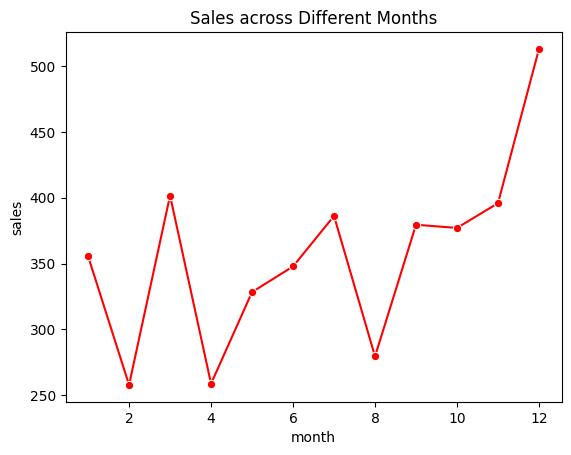

In [36]:
# plotting sales across different months
sns.lineplot(data=df_sample,x='month',
y='sales',marker='o',color='red',errorbar=None)
plt.title("Sales across Different Months")
plt.show()

---

# 4- Model Building

In [37]:
# defining feature columns and target column
features = ['day_of_week','month','onpromotion','isHoliday']
target = ['sales'] 

In [38]:
# separating features and target variable
# in variables X and y
X = df[features]
y = df[target]

In [39]:
# checking first few rows of X
X.head()

,day_of_week,month,onpromotion,isHoliday
0,1,1,0,1.0
1,1,1,0,1.0
2,1,1,0,1.0
3,1,1,0,1.0
4,1,1,0,1.0


In [40]:
# checking first few rows of y
y.head()

,sales
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [41]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
# feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# defining and training the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

---

# 5- Conclusion


## 📅 Date & Holiday Processing

* Missing holiday information is set to **`isHoliday = 0`**.
* Converted **`date`** to **datetime format**.
* Extracted new columns:

  * 🗓 **Day of Week**
  * 📆 **Month**
  * 🏷 **Year**

---

## 📊 Target & Features

* **Target variable:** `sales` 💰
* **Features selected for model:** `day_of_week, month, onpromotion, isHoliday`

---

## 🔍 Observations

* **Sales vs Day of Week:**

  * 🏖 Highest on weekends
  * 📉 Lowest on Thursdays
* **Sales vs Month:**

  * 🎄 Highest in November & December
  * 🌸 Lowest in April
* **Sales vs Promotions & Holiday:**

  * 📈 Increases with `onpromotion`
  * Slightly higher during `isHoliday = 1`
* **Promotions:**

  * Most `onpromotion` values are between 0–50, which correspond to **most sales**

---

## 🛠 Data Preparation

* **Train/Test Split:** 80% train / 20% test 🧪
* **Feature Scaling:** StandardScaler applied to all features ⚖️

---

## 🤖 Model Building

* **Algorithm:** Linear Regression 📈
* **Training:** Model trained on scaled feature variables
* **Purpose:** Predict `sales` based on time, promotions, and holidays

---
